# Problem 1
In homework 2, we generated a sample dataset and built a regression tree. Take
this same dataset and fit it with a neural network using the PyTorch library. Please
choose reasonable values for the hyperparameters that aren’t specified below.
- Try using a single hidden layer with a tanh activation functions and a linear
output activation. Use minibatches of 100 rows at a time and graph the training
and test error across epochs.

0 592364.5
1 590695.9375
2 589060.4375
3 587424.25
4 585780.25
5 584148.125
6 582475.25
7 580813.6875
8 579138.875
9 577482.8125
10 575726.6875
11 574041.8125
12 572337.625
13 570550.1875
14 568809.6875
15 567038.875
16 565209.9375
17 563403.875
18 561582.3125
19 559728.625
20 557945.3125
21 556087.0625
22 554299.375
23 552451.375
24 550630.6875
25 548835.75
26 547002.1875
27 545243.875
28 543443.375
29 541710.625
30 539967.25
31 538340.375
32 536667.6875
33 535020.3125
34 533404.5
35 531808.3125
36 530304.6875
37 528831.5
38 527360.75
39 525963.3125
40 524602.4375
41 523263.8125
42 521958.5625
43 520752.625
44 519553.0625
45 518423.53125
46 517321.53125
47 516223.78125
48 515245.21875
49 514297.1875
50 513394.28125
51 512517.875
52 511701.625
53 510904.34375
54 510182.28125
55 509451.90625
56 508788.6875
57 508210.15625
58 507590.71875
59 507053.15625
60 506546.96875
61 506041.53125
62 505621.3125
63 505214.03125
64 504820.0625
65 504467.46875
66 504143.125
67 503811.0
68 503565.96875

519 490908.3125
520 490889.1875
521 490870.34375
522 490852.625
523 490834.34375
524 490817.875
525 490799.15625
526 490781.59375
527 490763.0
528 490745.1875
529 490728.21875
530 490710.03125
531 490692.0625
532 490672.65625
533 490657.1875
534 490639.6875
535 490621.75
536 490603.3125
537 490587.5625
538 490570.34375
539 490553.3125
540 490537.46875
541 490519.4375
542 490503.03125
543 490486.125
544 490468.65625
545 490450.84375
546 490434.9375
547 490419.125
548 490401.5
549 490386.4375
550 490369.8125
551 490353.78125
552 490337.53125
553 490322.40625
554 490306.25
555 490289.84375
556 490273.75
557 490257.0
558 490241.125
559 490224.40625
560 490208.65625
561 490192.0
562 490177.09375
563 490162.46875
564 490145.4375
565 490131.375
566 490114.875
567 490099.84375
568 490083.75
569 490069.09375
570 490053.4375
571 490038.40625
572 490023.34375
573 490008.34375
574 489991.875
575 489976.84375
576 489962.625
577 489946.90625
578 489933.1875
579 489916.875
580 489901.6875
581 489887.

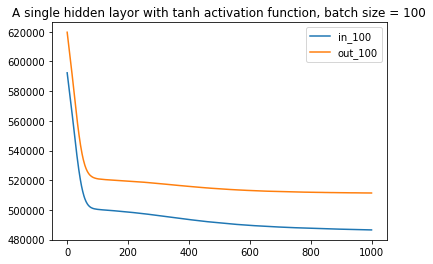

In [9]:
import time
import matplotlib.pyplot as plt
import numpy as np

from torch import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset

def generate_test_data(N):
    x = np.random.randn(N, 5)
    y = np.where(x[:, 0] > 0, 2, 5)
    y = y + np.where(x[:, 1] > 0, -3, 3)
    y = y + np.where(x[:, 2] > 0, 0, 0.5)
    y = y + 10 * np.random.randn(N)
    return x,y 

N = 5000
num_features = 5
l1_size = 30
l1_act = torch.nn.Tanh()


dtype = torch.float
device = torch.device("cpu")
torch.manual_seed(78)
x, y = generate_test_data(2*N)
x, y = torch.Tensor(x), torch.Tensor(y)
x_all = x
y_all =  y
x = x[:N]
y = y[:N]
x_out = x_all[N:]
y_out = y_all[N:]



plt.clf()
times = []
batch_size = 100
num_epochs = 1000
ds = DataLoader(TensorDataset(x, y), batch_size=batch_size, shuffle=True)
model = torch.nn.Sequential(torch.nn.Linear(num_features, l1_size), l1_act, torch.nn.Linear(l1_size, 1))
loss_fn = torch.nn.MSELoss(size_average=False)
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
err_in, err_out = [],[]
ct = time.time()

for t in range(num_epochs):
    # Forward pass: compute predicted y by passing x to the model.
    for xi, yi in ds:
        y_pred = model(xi)

        # Compute and print loss.
        loss = loss_fn(y_pred[:,0], yi)
        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the Tensors it will update (which are the learnable weights
        # of the model)
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()

        # Calling the step function on an Optimizer makes an update to its parameters
        optimizer.step()

    y_pred = model(x)
    # Compute and print loss.
    loss = loss_fn(y_pred[:, 0], y)
    print(t, loss.item())
    err_in.append(loss)
    err_out.append(loss_fn(model(x_out)[:, 0], y_out))
times.append((time.time() - ct) / num_epochs)
plt.plot(err_in, label=f'in_{batch_size}')
plt.plot(err_out, label=f'out_{batch_size}')
plt.title("A single hidden layor with tanh activation function, batch size = 100")
plt.legend()
plt.show()

In [10]:
times

[0.10166436457633972]

- Repeat the previous trial using ReLu instead of tanh for the hidden activation
including graphs of training and test error. Which version is faster to converge?

### Ans: ReLu converge faster than tanh in single hidden layer NN as we can see in the comparison between two graph, the second graph reach the corner a little earlier than the first.

0 611087.125
1 609124.375
2 607170.125
3 605282.625
4 603459.1875
5 601563.1875
6 599764.1875
7 597949.5625
8 596097.9375
9 594315.5
10 592502.375
11 590704.1875
12 588854.8125
13 587075.875
14 585257.875
15 583442.3125
16 581620.3125
17 579802.5625
18 577986.9375
19 576236.75
20 574412.875
21 572659.8125
22 570895.4375
23 569133.0625
24 567373.6875
25 565676.75
26 563949.1875
27 562289.1875
28 560640.5625
29 558987.6875
30 557456.125
31 555813.0625
32 554329.0
33 552868.4375
34 551458.4375
35 549996.5625
36 548720.5625
37 547392.1875
38 546112.25
39 544847.5625
40 543731.5625
41 542591.5625
42 541504.0
43 540455.375
44 539388.0
45 538496.625
46 537555.375
47 536688.5
48 535878.0625
49 535073.375
50 534302.75
51 533602.0
52 532925.6875
53 532280.0
54 531676.8125
55 531099.8125
56 530559.1875
57 530038.75
58 529544.4375
59 529105.625
60 528664.5625
61 528235.1875
62 527836.625
63 527520.0625
64 527160.0625
65 526819.75
66 526514.25
67 526199.1875
68 525908.75
69 525646.9375
70 525413.12

521 514113.15625
522 514105.09375
523 514096.34375
524 514088.375
525 514079.53125
526 514072.28125
527 514064.34375
528 514055.96875
529 514049.15625
530 514039.25
531 514031.84375
532 514023.625
533 514015.84375
534 514007.5
535 513999.8125
536 513992.4375
537 513983.78125
538 513975.71875
539 513968.0625
540 513959.125
541 513952.53125
542 513943.875
543 513935.25
544 513927.9375
545 513920.65625
546 513912.28125
547 513903.21875
548 513895.9375
549 513887.34375
550 513879.40625
551 513873.0
552 513864.71875
553 513855.96875
554 513848.90625
555 513840.84375
556 513833.25
557 513824.6875
558 513816.9375
559 513809.40625
560 513801.90625
561 513793.6875
562 513786.375
563 513778.46875
564 513770.875
565 513762.15625
566 513753.96875
567 513747.15625
568 513738.21875
569 513730.0625
570 513724.09375
571 513715.875
572 513707.25
573 513699.96875
574 513691.5
575 513684.84375
576 513675.34375
577 513668.84375
578 513660.53125
579 513653.65625
580 513646.15625
581 513637.90625
582 513631

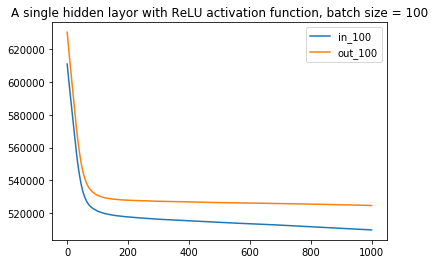

In [3]:
N = 5000
num_features = 5
l1_size = 30
l1_act = torch.nn.ReLU()


dtype = torch.float
device = torch.device("cpu")
torch.manual_seed(78)
x, y = generate_test_data(2*N)
x, y = torch.Tensor(x), torch.Tensor(y)
x_all = x
y_all =  y
x = x[:N]
y = y[:N]
x_out = x_all[N:]
y_out = y_all[N:]



plt.clf()
times = []
batch_size = 100
num_epochs = 1000
ds = DataLoader(TensorDataset(x, y), batch_size=batch_size, shuffle=True)
model = torch.nn.Sequential(torch.nn.Linear(num_features, l1_size), l1_act, torch.nn.Linear(l1_size, 1))
loss_fn = torch.nn.MSELoss(size_average=False)
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
err_in, err_out = [],[]
ct = time.time()

for t in range(num_epochs):
    # Forward pass: compute predicted y by passing x to the model.
    for xi, yi in ds:
        y_pred = model(xi)

        # Compute and print loss.
        loss = loss_fn(y_pred[:,0], yi)
        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the Tensors it will update (which are the learnable weights
        # of the model)
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()

        # Calling the step function on an Optimizer makes an update to its parameters
        optimizer.step()

    y_pred = model(x)
    # Compute and print loss.
    loss = loss_fn(y_pred[:, 0], y)
    print(t, loss.item())
    err_in.append(loss)
    err_out.append(loss_fn(model(x_out)[:, 0], y_out))
times.append((time.time() - ct) / num_epochs)
plt.plot(err_in, label=f'in_{batch_size}')
plt.plot(err_out, label=f'out_{batch_size}')
plt.title("A single hidden layor with ReLU activation function, batch size = 100")
plt.legend()
plt.show()

In [4]:
times

[0.09622008967399596]

- Staying with ReLU as the hidden activation function, add a 2nd hidden layer and
graph training and test errors across epochs. Does it take more or less time to
converge and why? Does it produce a better result than a single layer and why?

### Ans: As we can see from the graph, it converges much faster than singler layer for the two hidden layer NN because it can learn non-linear feature more quickly . It didn't produces better result than a single layer because it has higher out of sample error than the single layer.

0 638435.6875
1 635588.8125
2 632444.0625
3 628757.8125
4 624549.25
5 619635.0625
6 614242.4375
7 608476.75
8 602372.75
9 596048.625
10 589637.0625
11 583318.375
12 577110.3125
13 571609.875
14 566347.3125
15 561676.4375
16 557738.75
17 554325.5625
18 551384.3125
19 549093.375
20 547177.25
21 545377.5625
22 543826.0
23 542671.8125
24 541610.125
25 540658.875
26 539834.8125
27 538980.5
28 538266.875
29 537647.625
30 536982.1875
31 536422.0625
32 535889.625
33 535387.5
34 534954.5
35 534504.75
36 534087.9375
37 533696.5
38 533330.9375
39 533021.875
40 532701.5
41 532373.125
42 532089.875
43 531812.8125
44 531548.5
45 531334.125
46 531104.4375
47 530904.625
48 530691.25
49 530506.4375
50 530324.75
51 530155.9375
52 530000.5625
53 529849.125
54 529694.125
55 529558.0625
56 529423.5625
57 529302.125
58 529185.5
59 529056.4375
60 528954.4375
61 528835.5625
62 528741.5
63 528628.5
64 528534.625
65 528439.25
66 528359.4375
67 528274.0
68 528182.0
69 528101.0
70 528017.5
71 527937.375
72 527859

528 506581.0625
529 506554.375
530 506528.625
531 506498.3125
532 506472.8125
533 506444.71875
534 506417.21875
535 506391.84375
536 506369.03125
537 506336.5
538 506310.625
539 506283.28125
540 506256.625
541 506231.6875
542 506204.75
543 506177.71875
544 506154.03125
545 506127.8125
546 506099.4375
547 506074.9375
548 506050.75
549 506021.78125
550 505995.0
551 505967.78125
552 505944.78125
553 505917.75
554 505890.25
555 505861.75
556 505837.0
557 505810.40625
558 505785.96875
559 505757.9375
560 505732.0
561 505706.5
562 505680.59375
563 505660.40625
564 505631.625
565 505606.28125
566 505583.21875
567 505557.0
568 505534.15625
569 505508.46875
570 505484.4375
571 505460.125
572 505438.28125
573 505415.15625
574 505387.21875
575 505371.625
576 505338.84375
577 505313.5
578 505291.34375
579 505284.25
580 505243.5
581 505228.4375
582 505200.375
583 505172.5
584 505148.78125
585 505127.96875
586 505104.1875
587 505079.65625
588 505072.3125
589 505037.40625
590 505018.40625
591 504988.

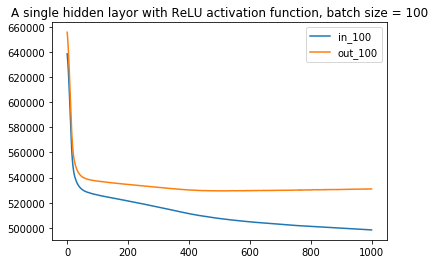

In [5]:
N = 5000
num_features = 5
l1_size = 30
l2_size = 30
l1_act = torch.nn.ReLU()
l2_act = torch.nn.ReLU()

dtype = torch.float
device = torch.device("cpu")
torch.manual_seed(78)
x, y = generate_test_data(2*N)
x, y = torch.Tensor(x), torch.Tensor(y)
x_all = x
y_all =  y
x = x[:N]
y = y[:N]
x_out = x_all[N:]
y_out = y_all[N:]



plt.clf()
times = []
batch_size = 100
num_epochs = 1000
ds = DataLoader(TensorDataset(x, y), batch_size=batch_size, shuffle=True)
model = torch.nn.Sequential(torch.nn.Linear(num_features, l1_size), l1_act,torch.nn.Linear(l1_size, l2_size), l2_act, torch.nn.Linear(l1_size, 1))
loss_fn = torch.nn.MSELoss(size_average=False)
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
err_in, err_out = [],[]
ct = time.time()

for t in range(num_epochs):
    # Forward pass: compute predicted y by passing x to the model.
    for xi, yi in ds:
        y_pred = model(xi)

        # Compute and print loss.
        loss = loss_fn(y_pred[:,0], yi)
        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the Tensors it will update (which are the learnable weights
        # of the model)
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()

        # Calling the step function on an Optimizer makes an update to its parameters
        optimizer.step()

    y_pred = model(x)
    # Compute and print loss.
    loss = loss_fn(y_pred[:, 0], y)
    print(t, loss.item())
    err_in.append(loss)
    err_out.append(loss_fn(model(x_out)[:, 0], y_out))
times.append((time.time() - ct) / num_epochs)
plt.plot(err_in, label=f'in_{batch_size}')
plt.plot(err_out, label=f'out_{batch_size}')
plt.title("A single hidden layor with ReLU activation function, batch size = 100")
plt.legend()
plt.show()

In [6]:
times

[0.13446470642089844]